In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
old = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/nic/sic/inference-validation/2023-02-01T06.240h.nc")
fixed = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/latent-updates/fixed/inference-validation/2023-02-01T06.240h.nc")
heal5 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/latent-updates/heal5/inference-validation/2023-02-01T06.240h.nc")
o48 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/latent-updates/o48/inference-validation/2023-02-01T06.240h.nc")

In [3]:
def draw_arrows(ax, target_lon=0):
    from matplotlib.transforms import Bbox

    # Transform lon/lat to display coords, then to axes fraction
    proj = ccrs.Robinson()
    top_xy = proj.transform_point(target_lon, 90, ccrs.PlateCarree())
    bot_xy = proj.transform_point(target_lon, -90, ccrs.PlateCarree())
    
    # Draw the plot first so transforms are valid
    fig.canvas.draw()
    
    # Convert projected coords to axes fraction
    top_disp = ax.transData.transform(top_xy)
    top_ax = ax.transAxes.inverted().transform(top_disp)
    
    bot_disp = ax.transData.transform(bot_xy)
    bot_ax = ax.transAxes.inverted().transform(bot_disp)
    
    # Arrow ABOVE the plot pointing down
    ax.annotate(
        '', 
        xy=(top_ax[0], top_ax[1] + 0.02),  # arrowhead (just above top of map)
        xytext=(top_ax[0], top_ax[1] + 0.06),  # tail
        xycoords='axes fraction',
        arrowprops=dict(arrowstyle='->', color='red', lw=2),
    )
    
    # Arrow BELOW the plot pointing up
    ax.annotate(
        '',
        xy=(bot_ax[0], bot_ax[1] - 0.02),  # arrowhead (just below bottom of map)
        xytext=(bot_ax[0], bot_ax[1] - 0.04),  # tail
        xycoords='axes fraction',
        arrowprops=dict(arrowstyle='->', color='red', lw=2),
    )
    return 

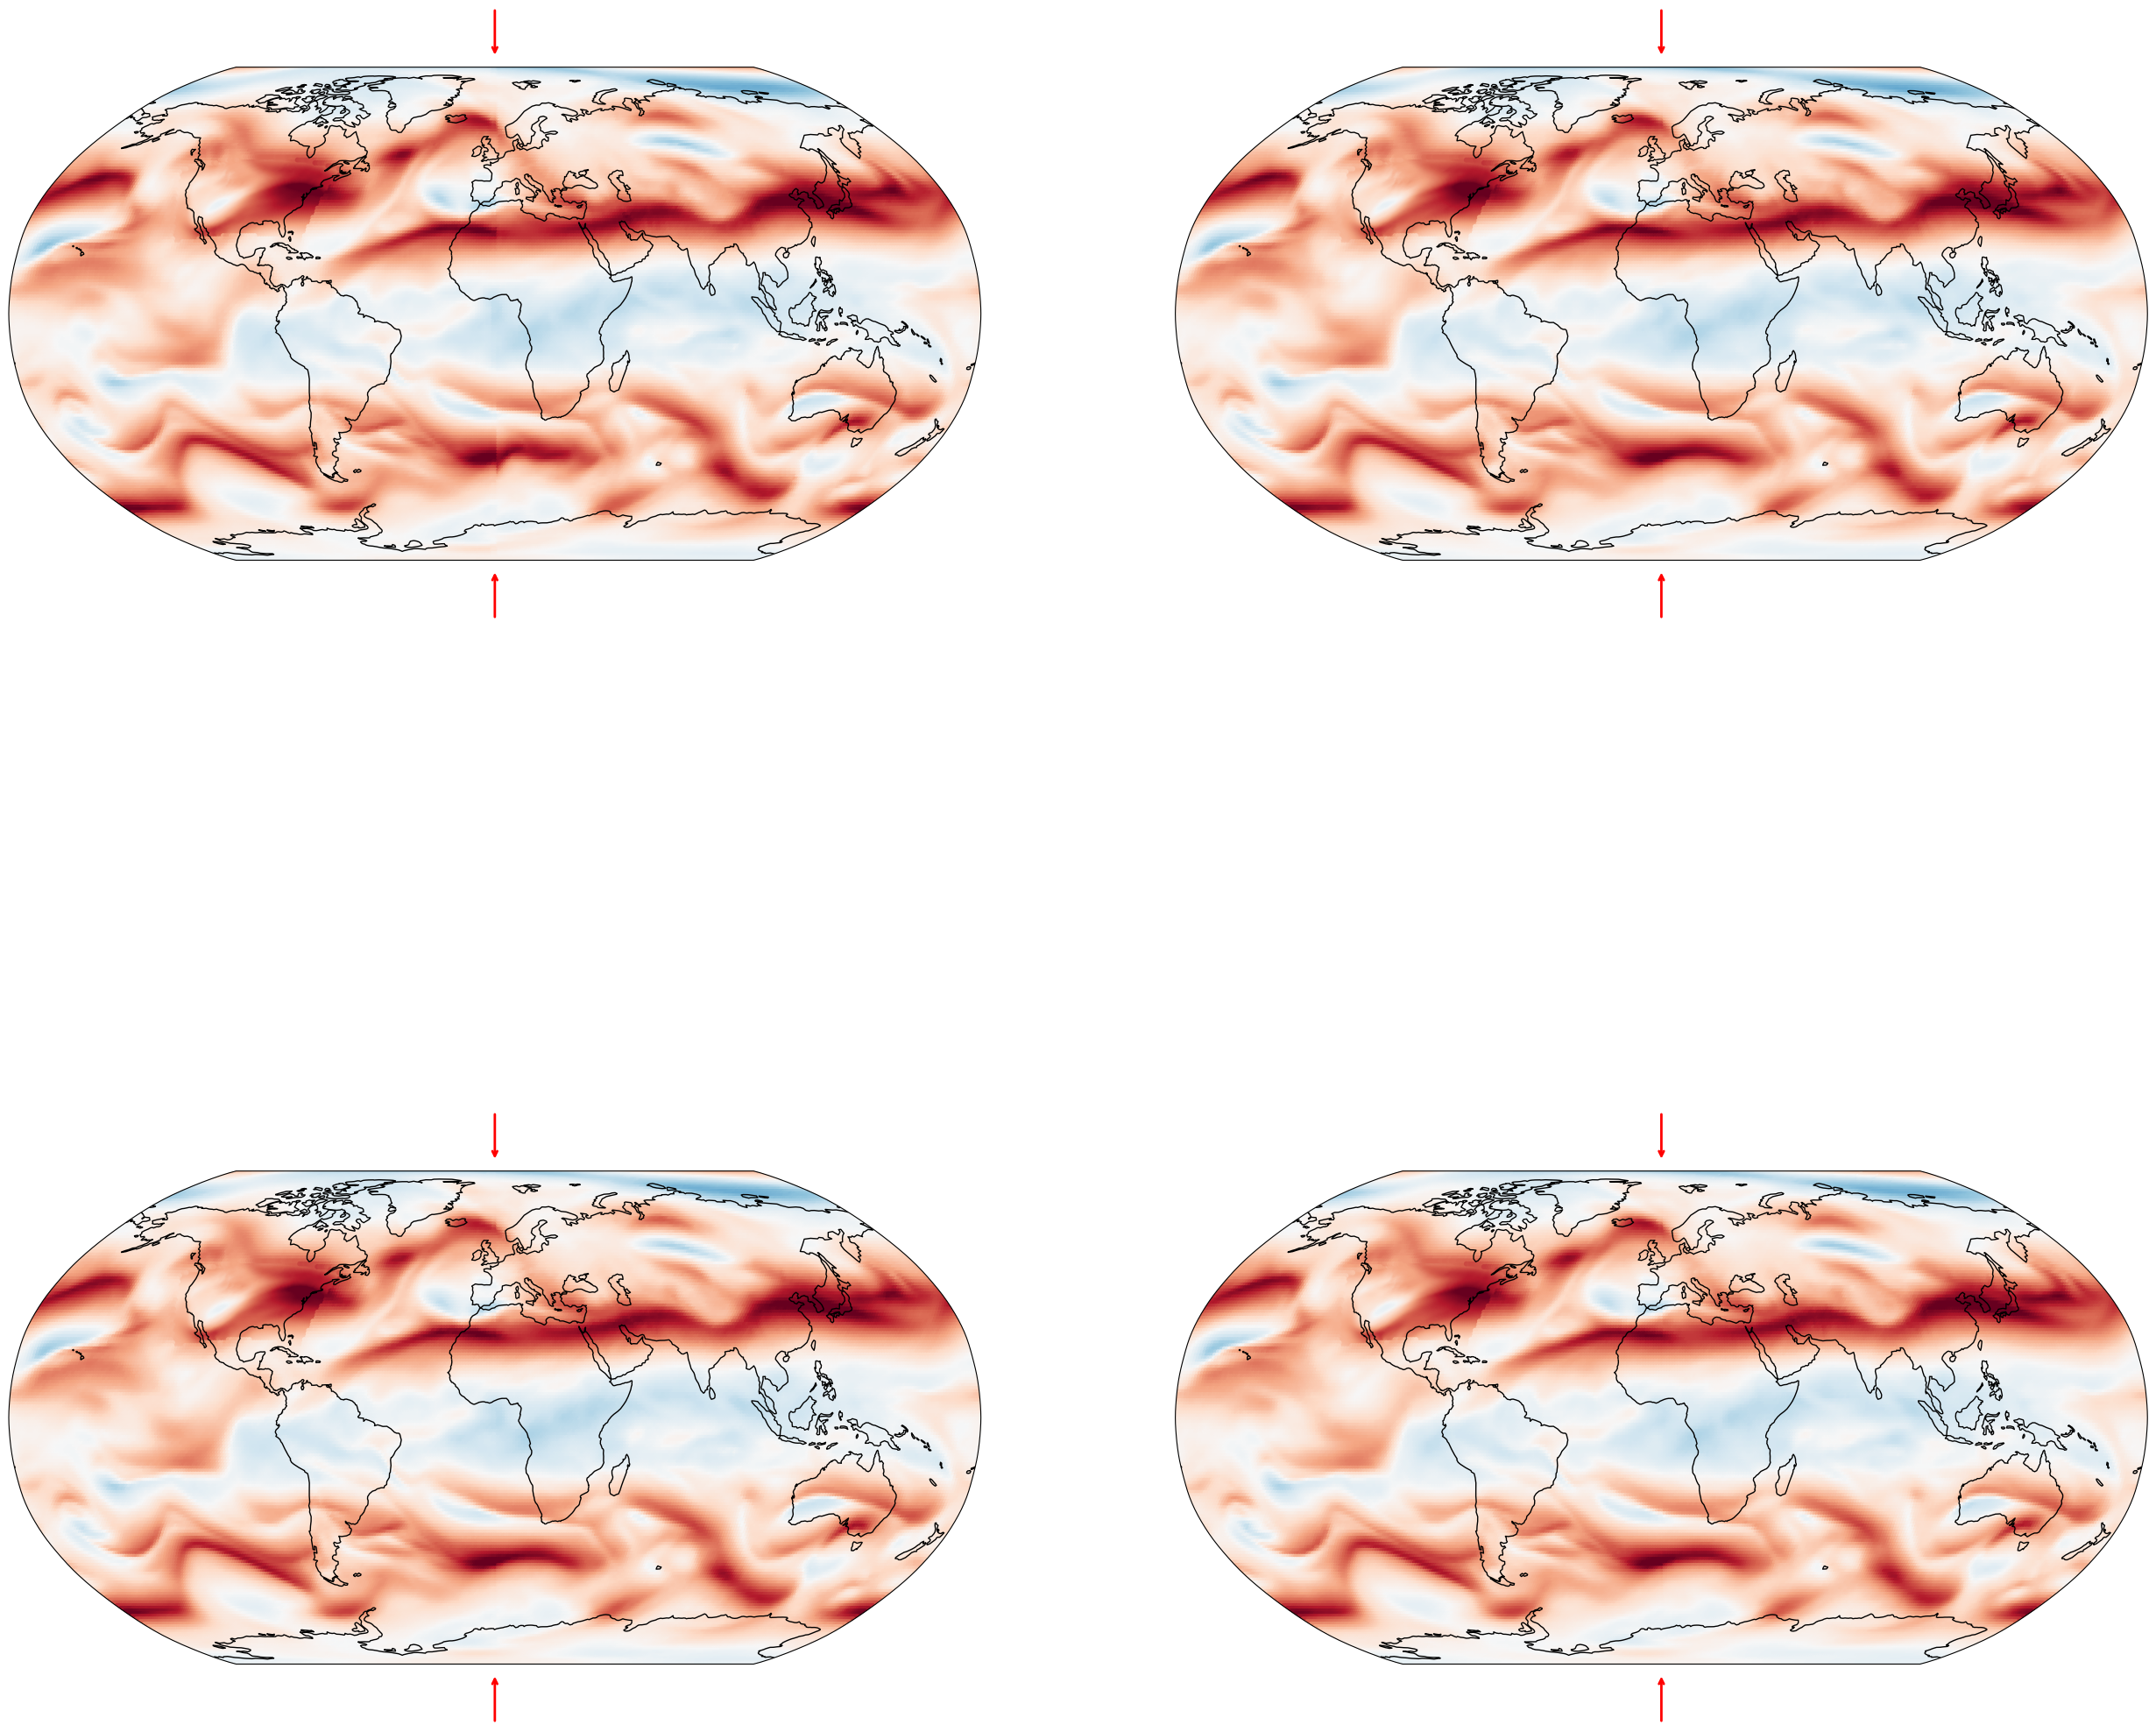

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(1.5*3*7,3*10), subplot_kw={"projection": ccrs.Robinson()})

for xds, ax in zip([old, fixed, heal5, o48], axs.flatten()):
    plotme = xds["u_250"]
    plotme = plotme.isel(time=4)# - plotme.isel(time=0)
    vmax = .9*plotme.max().values
    vmin = .9*plotme.min().values
    vmax = np.max(np.abs([vmax, vmin]))
    vmin = -vmax
    ax.scatter(
        xds.longitude,
        xds.latitude,
        c=plotme.values,
        s=10,
        transform=ccrs.PlateCarree(),
        cmap="RdBu_r",
        vmax=vmax,
        vmin=vmin,
    )
    ax.coastlines()

    draw_arrows(ax)

In [15]:
old = np.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/incorrectly-ordered-csmswt-trim10/latentx2.spongex1.combined.sorted.npz")
new = np.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/csmswt-trim10/latentx2.spongex1.combined.sorted.npz")

In [17]:
old["lon"]

array([359., 359., 359., ...,   1.,   1.,   1.])

In [18]:
new["lon"]

array([  3., 359., 111., ...,  91., 249., 135.])

In [20]:
old["lat"]

array([-89., -71.,  33., ...,  55.,  -5., -89.])

In [19]:
new["lat"]

array([ 89.,  89.,  89., ..., -89., -89., -89.])

In [26]:
import torch

In [52]:
gold = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/incorrectly-ordered-csmswt-trim10/graph.latentx2.spongex1.12knn_data.pt", weights_only=False, map_location="cpu")
gnew = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/csmswt-trim10/graph.latentx2.spongex1.12knn_data.pt", weights_only=False, map_location="cpu")

In [58]:
np.rad2deg(gold["hidden"]["x"])

tensor([[-89.0000, 359.0000],
        [-71.0000, 359.0000],
        [ 33.0000, 359.0000],
        ...,
        [ 55.0000,   1.0000],
        [ -5.0000,   1.0000],
        [-89.0000,   1.0000]])

In [61]:
np.rad2deg(gnew["hidden"]["x"])

tensor([[ 89.0000,   3.0000],
        [ 89.0000, 359.0000],
        [ 89.0000, 111.0000],
        ...,
        [-89.0000,  91.0000],
        [-89.0000, 249.0000],
        [-89.0000, 135.0000]])

In [63]:
np.rad2deg(gnew["data"]["x"])

tensor([[ 22.7961, 238.2964],
        [ 22.8299, 238.4328],
        [ 22.8635, 238.5693],
        ...,
        [-89.5000, 357.5000],
        [-89.5000, 358.5000],
        [-89.5000, 359.5000]])